In [69]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import constants
import matplotlib.pyplot as plt
import numpy as np

In [70]:
import pandas as pd
ds = pd.read_csv('SR1.csv')

In [71]:
ds.head(20)

,Time,ENSMUST ID,Transcript,Length (bp),Coverage,FPKM
0,0.000,155579,204,3350,6.01099,0.864615
1,0.000,16406,201,3090,1.87709,0.269998
2,0.000,155503,203,516,0.00000,0.000000
3,0.000,125391,202,489,0.00000,0.000000
4,0.167,155579,204,3350,4.54408,0.781544
5,0.167,16406,201,3090,1.34884,0.231989
6,0.167,155503,203,516,0.00000,0.000000
7,0.167,125391,202,489,0.00000,0.000000
8,1.000,155579,204,3350,12.14990,1.694820
9,1.000,16406,201,3090,0.00000,0.000000


In [72]:
ds.shape

(24, 6)

In [73]:
ds.columns

Index(['Time', 'ENSMUST ID', 'Transcript', 'Length (bp)', 'Coverage', 'FPKM'], dtype='object')

In [74]:
print(ds['Transcript'])

0     204
1     201
2     203
3     202
4     204
5     201
6     203
7     202
8     204
9     201
10    203
11    202
12    204
13    201
14    203
15    202
16    204
17    201
18    203
19    202
20    204
21    201
22    203
23    202
Name: Transcript, dtype: int64


In [75]:
print(ds['FPKM'])

0     0.864615
1     0.269998
2     0.000000
3     0.000000
4     0.781544
5     0.231989
6     0.000000
7     0.000000
8     1.694820
9     0.000000
10    0.000000
11    0.000000
12    0.701334
13    0.000000
14    0.000000
15    0.000000
16    1.154700
17    0.000000
18    0.000000
19    0.000000
20    7.842220
21    0.000000
22    0.000000
23    0.000000
Name: FPKM, dtype: float64


In [76]:
print(ds['Time'])

0      0.000
1      0.000
2      0.000
3      0.000
4      0.167
5      0.167
6      0.167
7      0.167
8      1.000
9      1.000
10     1.000
11     1.000
12     6.000
13     6.000
14     6.000
15     6.000
16    24.000
17    24.000
18    24.000
19    24.000
20    72.000
21    72.000
22    72.000
23    72.000
Name: Time, dtype: float64


In [77]:

print(ds[ds['Transcript'] == 204]['FPKM'].median())
print(ds[ds['Transcript'] == 204]['Coverage'].median())

1.0096575
7.25787


In [78]:
groupby_TS = ds.groupby('Transcript')
for transcript, value in groupby_TS['FPKM']:
    print((transcript, value.mean()))

(201, np.float64(0.08366449999999999))
(202, np.float64(0.0))
(203, np.float64(0.0))
(204, np.float64(2.1732055))


In [79]:
groupby_TS = ds.groupby('Transcript')
for transcript, value in groupby_TS['Coverage']:
    print((transcript, value.mean()))

(201, np.float64(0.537655))
(202, np.float64(0.0))
(203, np.float64(0.0))
(204, np.float64(15.765885000000003))


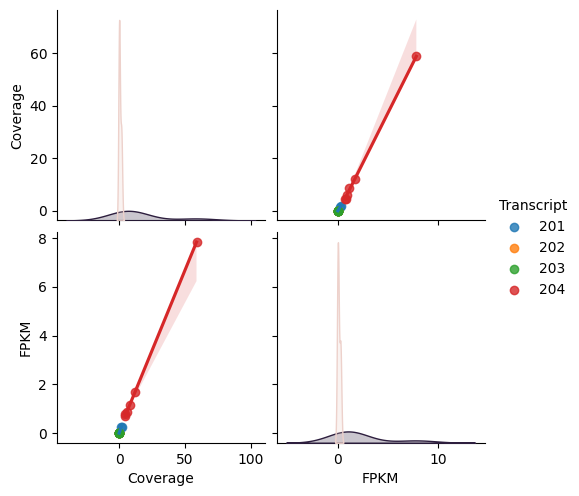

In [80]:
sns.pairplot(ds, vars=['Coverage', 'FPKM'],
                 kind='reg', hue='Transcript') 

<Axes: xlabel='FPKM', ylabel='Density'>

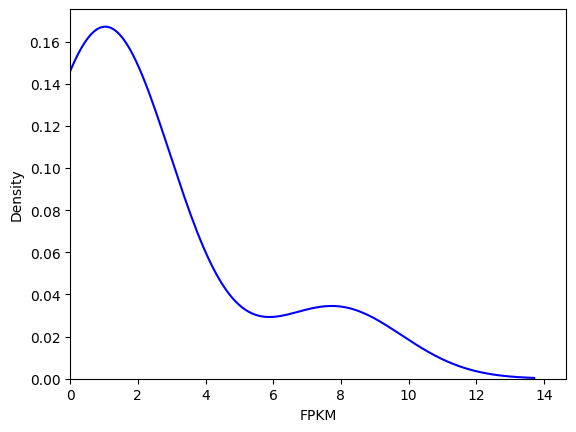

In [81]:
_204 = ds[ds['Transcript']==204]['FPKM']
pt = sns.kdeplot(_204, color = 'blue')
pt.set_xlim(xmin = 0)
pt

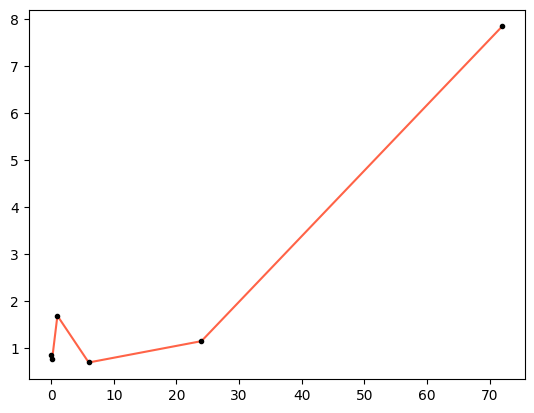

In [121]:
_204 = ds[ds['Transcript']==204]

x = _204['Time']
y = _204['FPKM']

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
sm_x, sm_y = sm_lowess(y, x,  frac=0.2, 
                           it=5, return_sorted = True).T
plt.plot(sm_x, sm_y, color='tomato')
plt.plot(x, y, 'k.')

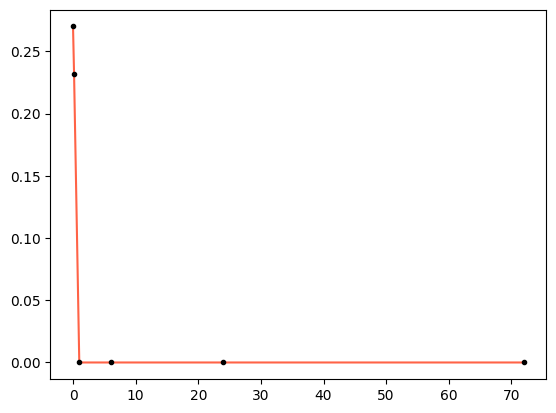

In [122]:
_201 = ds[ds['Transcript']==201]

x = _201['Time']
y = _201['FPKM']

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
sm_x, sm_y = sm_lowess(y, x,  frac=0.2, 
                           it=5, return_sorted = True).T
plt.plot(sm_x, sm_y, color='tomato')
plt.plot(x, y, 'k.')

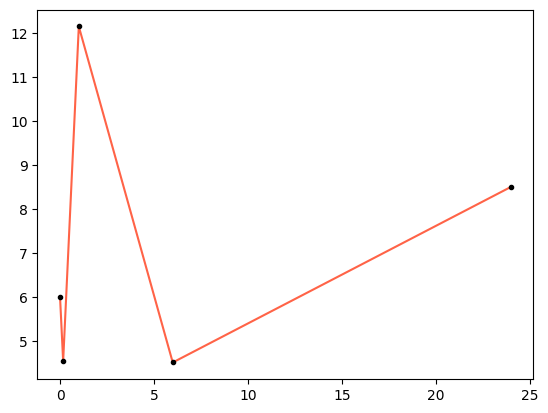

In [123]:
_204 = ds[ds['Transcript']==204]

x = _204[_204['Time'] <= 24]['Time']
y = _204[_204['Time'] <= 24]['Coverage']

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
sm_x, sm_y = sm_lowess(y, x,  frac=0.2, 
                           it=5, return_sorted = True).T
plt.plot(sm_x, sm_y, color='tomato')
plt.plot(x, y, 'k.')

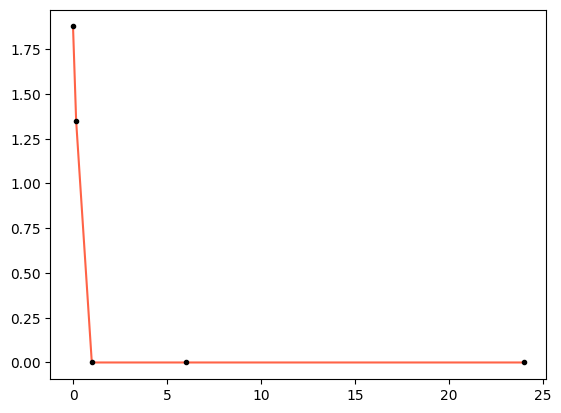

In [125]:
_201 = ds[ds['Transcript']==201]

x = _201[_201['Time'] <= 24]['Time']
y = _201[_201['Time'] <= 24]['Coverage']

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
sm_x, sm_y = sm_lowess(y, x,  frac=0.2, 
                           it=5, return_sorted = True).T
plt.plot(sm_x, sm_y, color='tomato')
plt.plot(x, y, 'k.')

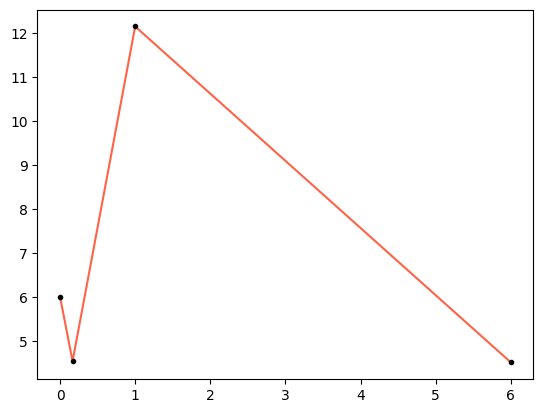

In [126]:
_204 = ds[ds['Transcript']==204]

x = _204[_204['Time'] < 24]['Time']
y = _204[_204['Time'] < 24]['Coverage']

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
sm_x, sm_y = sm_lowess(y, x,  frac=0.2, 
                           it=5, return_sorted = True).T
plt.plot(sm_x, sm_y, color='tomato')
plt.plot(x, y, 'k.')

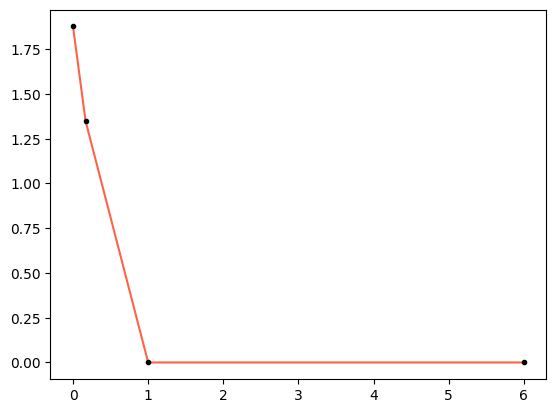

In [127]:
_201 = ds[ds['Transcript']==201]

x = _201[_201['Time'] < 24]['Time']
y = _201[_201['Time'] < 24]['Coverage']

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
sm_x, sm_y = sm_lowess(y, x,  frac=0.2, 
                           it=5, return_sorted = True).T
plt.plot(sm_x, sm_y, color='tomato')
plt.plot(x, y, 'k.')